In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import pickle

In [2]:
df = pd.read_csv('cleaned.csv', index_col=0)

In [3]:
# drop nans after preprocessing
df.dropna(inplace=True)

In [4]:
# largely unbalanced data, though we can tell twitter is mostly popular among wich arab countries, if we divided by population we would know
# which countries got high percentage of its population using twitter
df['dialect'].value_counts(normalize=True)*100

EG    12.575385
PL     9.551675
KW     9.194544
LY     7.966755
QA     6.780468
JO     6.096786
LB     6.027762
SA     5.847340
AE     5.740310
BH     5.738344
OM     4.170899
SY     3.543571
DZ     3.531776
IQ     3.383026
SD     3.150836
MA     2.517392
YE     2.165504
TN     2.017627
Name: dialect, dtype: float64

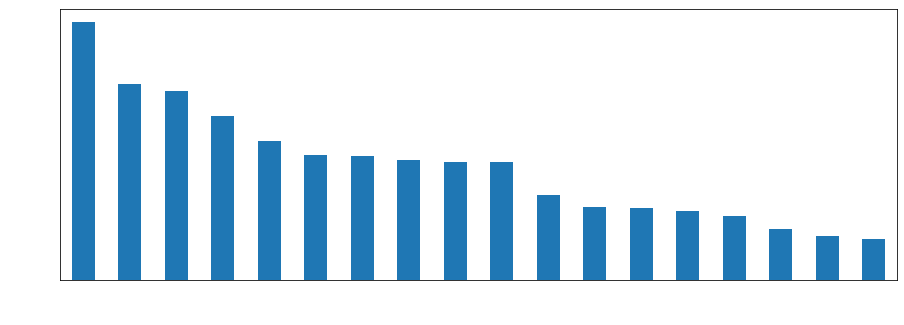

In [5]:
# nice plot for above figures (drawn with white labels because i use a dark theme)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
df['dialect'].value_counts().plot.bar()

ax.set_xlabel('Classes')
ax.set_ylabel('Freq')

ax.xaxis.label.set_color('w')
ax.yaxis.label.set_color('w')
ax.tick_params(axis='both', colors='w')

plt.show()

In [6]:
# splitting data for train, test
x_train, x_test, y_train, y_test = train_test_split(df['0'], df['dialect'], test_size=.08, stratify=df['dialect'], random_state=42)

In [7]:
# making a pipeline of tfidf vectorizer and a linear support vector machine
vec = TfidfVectorizer(analyzer='char_wb', ngram_range=(1, 15))
clf = LinearSVC()
pipe_tfidf = make_pipeline(vec, clf)
pipe_tfidf.fit(x_train, y_train);

In [8]:
y_pred = pipe_tfidf.predict(x_test)

In [9]:
# checking merics for the classes
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          AE       0.50      0.48      0.49      2102
          BH       0.46      0.39      0.43      2102
          DZ       0.66      0.59      0.63      1293
          EG       0.74      0.89      0.81      4606
          IQ       0.68      0.60      0.64      1239
          JO       0.49      0.39      0.43      2233
          KW       0.55      0.66      0.60      3368
          LB       0.66      0.71      0.68      2208
          LY       0.71      0.74      0.72      2918
          MA       0.79      0.67      0.73       922
          OM       0.50      0.41      0.45      1528
          PL       0.55      0.62      0.59      3498
          QA       0.54      0.58      0.56      2483
          SA       0.48      0.53      0.50      2142
          SD       0.73      0.65      0.69      1154
          SY       0.51      0.39      0.44      1298
          TN       0.73      0.53      0.61       739
          YE       0.47    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


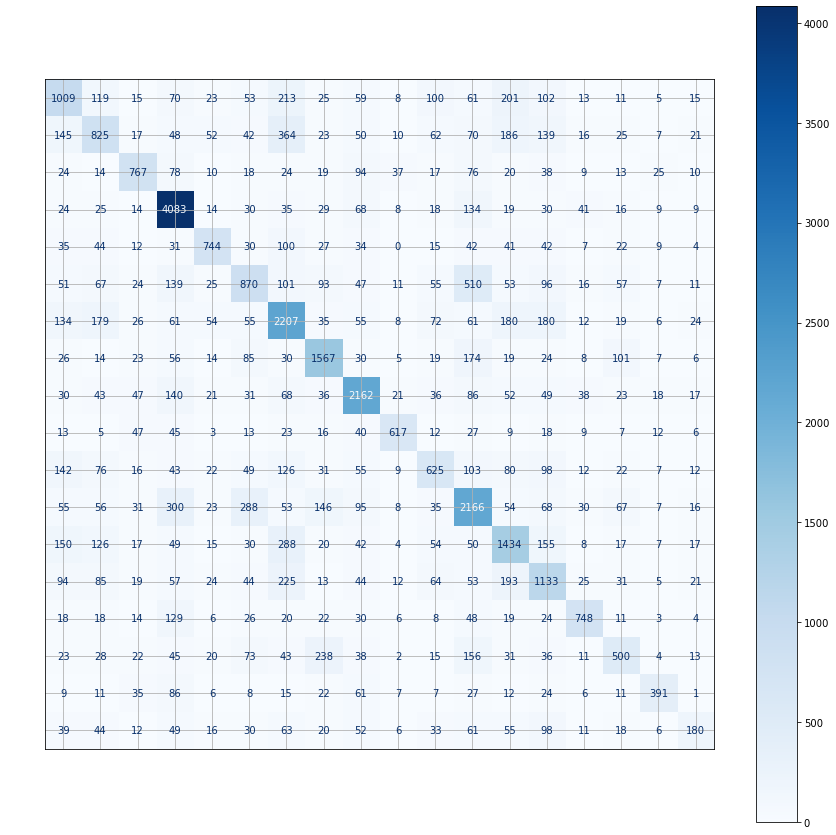

In [10]:
# plotting confusion matrix
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot()
plot_confusion_matrix(pipe_tfidf, x_test, y_test,ax=ax,cmap='Blues')  

plt.grid()
ax.set_title('Linear SVC', c='w')

ax.xaxis.label.set_color('w')
ax.yaxis.label.set_color('w')
ax.tick_params(axis='both', colors='w')

plt.show();

In [11]:
# exporting machine learning model to use in api
pickle.dump(pipe_tfidf, open('model.pkl','wb'))